Reference: [48] 特徴量選択のまとめ (EN: Summary of feature selection)

##### This is Japanese Web site

https://qiita.com/shimopino/items/5fee7504c7acf044a521#filter-method

In [ ]:
# Loading the library

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

## Basic library
import numpy as np
import pandas as pd
## Converters
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler
## Predictor (Estimator)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
## Pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
## Split data sets (training and test data)
from sklearn.model_selection import train_test_split
## Parameter adjustment
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ParameterGrid
## Evaluation function
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
# Mount the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Read Data
emotion_category = 'group'
location = "/content/drive/MyDrive/05_workspace/01_msc_project/data/output/12_face_pose_merged/" + emotion_category +"/openface_plus_openpose_inner_without_NaN_success0.csv"
df = pd.read_csv(location)
df.head()

,Unnamed: 0,Unnamed: 0.1,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,...,hr_point7_c,hr_point8_x,hr_point8_y,hr_point8_c,hr_point9_x,hr_point9_y,hr_point9_c,hr_point10_x,hr_point10_y,hr_point10_c,hr_point11_x,hr_point11_y,hr_point11_c,hr_point12_x,hr_point12_y,hr_point12_c,hr_point13_x,hr_point13_y,hr_point13_c,hr_point14_x,hr_point14_y,hr_point14_c,hr_point15_x,hr_point15_y,hr_point15_c,hr_point16_x,hr_point16_y,hr_point16_c,hr_point17_x,hr_point17_y,hr_point17_c,hr_point18_x,hr_point18_y,hr_point18_c,hr_point19_x,hr_point19_y,hr_point19_c,hr_point20_x,hr_point20_y,hr_point20_c
0,0,0,1,0,0.00,0.98,1,0.252709,0.591373,-0.765778,-0.010047,0.506404,-0.862238,0.148,0.593,618.2,621.8,627.1,631.2,631.5,628.0,622.5,618.5,611.1,615.5,620.3,625.4,630.0,633.2,635.1,631.9,627.8,622.9,618.3,614.2,621.7,623.6,626.0,627.6,627.5,...,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000
1,1,1,2,0,0.04,0.98,1,0.273988,0.652730,-0.706310,-0.046856,0.572899,-0.818286,0.148,0.677,622.1,625.0,629.6,633.2,633.7,630.9,626.2,622.6,614.1,618.3,622.9,627.8,632.1,634.9,636.6,634.5,631.3,626.9,622.3,617.9,625.2,626.8,628.8,630.0,629.8,...,0.008867,292.673,805.203,0.006272,322.261,742.081,0.012525,315.358,791.395,0.006488,315.358,802.244,0.007025,297.605,804.217,0.005436,315.358,736.164,0.016124,314.371,790.409,0.008238,313.385,799.285,0.008992,299.577,801.258,0.006138,316.344,732.218,0.022193,279.852,759.834,0.010218,297.605,790.409,0.008342,290.701,789.422,0.006139
2,2,2,3,0,0.08,0.98,1,0.292067,0.650612,-0.701000,-0.000686,0.551724,-0.834027,0.188,0.664,625.4,628.3,632.9,636.5,636.9,634.1,629.4,625.8,617.0,621.3,626.0,631.0,635.2,638.0,639.6,637.5,634.2,629.8,625.2,620.8,628.4,630.0,632.0,633.2,633.0,...,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000
3,3,3,4,0,0.12,0.98,1,0.159617,0.636737,-0.754380,0.007566,0.534840,-0.844920,0.104,0.632,626.8,629.9,635.1,639.3,640.1,637.1,631.7,627.5,620.8,624.9,629.5,634.5,639.2,642.6,644.8,641.9,638.0,633.1,628.4,624.3,630.6,632.5,634.8,636.2,635.9,...,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000
4,4,4,5,0,0.16,0.98,1,0.134459,0.630543,-0.764419,0.032191,0.521385,-0.852714,0.103,0.619,629.9,633.1,638.5,642.8,643.6,640.5,634.9,630.6,623.8,628.2,633.1,638.5,643.4,646.8,649.0,646.0,641.9,636.8,631.9,627.4,633.9,635.8,638.1,639.6,639.2,...,0.009135,370.110,797.743,0.006603,367.296,739.589,0.014127,393.559,753.658,0.010019,381.365,788.363,0.007215,371.986,797.743,0.006379,350.412,744.278,0.021773,386.993,743.340,0.012216,368.234,787.425,0.010260,364.482,792.115,0.008984,349.474,736.775,0.032525,334.467,772.418,0.012175,330.715,780.859,0.013175,338.218,782.735,0.009228


In [ ]:
df.shape

(360657, 1130)

In [ ]:
class2idx = {
    'ambiguous':0,
    'negative':1,
    'neutral':2,
    'positive':3
}

idx2class = {v: k for k, v in class2idx.items()}

df['emotion'].replace(class2idx, inplace=True)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,...,hr_point7_c,hr_point8_x,hr_point8_y,hr_point8_c,hr_point9_x,hr_point9_y,hr_point9_c,hr_point10_x,hr_point10_y,hr_point10_c,hr_point11_x,hr_point11_y,hr_point11_c,hr_point12_x,hr_point12_y,hr_point12_c,hr_point13_x,hr_point13_y,hr_point13_c,hr_point14_x,hr_point14_y,hr_point14_c,hr_point15_x,hr_point15_y,hr_point15_c,hr_point16_x,hr_point16_y,hr_point16_c,hr_point17_x,hr_point17_y,hr_point17_c,hr_point18_x,hr_point18_y,hr_point18_c,hr_point19_x,hr_point19_y,hr_point19_c,hr_point20_x,hr_point20_y,hr_point20_c
0,0,0,1,0,0.00,0.98,1,0.252709,0.591373,-0.765778,-0.010047,0.506404,-0.862238,0.148,0.593,618.2,621.8,627.1,631.2,631.5,628.0,622.5,618.5,611.1,615.5,620.3,625.4,630.0,633.2,635.1,631.9,627.8,622.9,618.3,614.2,621.7,623.6,626.0,627.6,627.5,...,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000
1,1,1,2,0,0.04,0.98,1,0.273988,0.652730,-0.706310,-0.046856,0.572899,-0.818286,0.148,0.677,622.1,625.0,629.6,633.2,633.7,630.9,626.2,622.6,614.1,618.3,622.9,627.8,632.1,634.9,636.6,634.5,631.3,626.9,622.3,617.9,625.2,626.8,628.8,630.0,629.8,...,0.008867,292.673,805.203,0.006272,322.261,742.081,0.012525,315.358,791.395,0.006488,315.358,802.244,0.007025,297.605,804.217,0.005436,315.358,736.164,0.016124,314.371,790.409,0.008238,313.385,799.285,0.008992,299.577,801.258,0.006138,316.344,732.218,0.022193,279.852,759.834,0.010218,297.605,790.409,0.008342,290.701,789.422,0.006139
2,2,2,3,0,0.08,0.98,1,0.292067,0.650612,-0.701000,-0.000686,0.551724,-0.834027,0.188,0.664,625.4,628.3,632.9,636.5,636.9,634.1,629.4,625.8,617.0,621.3,626.0,631.0,635.2,638.0,639.6,637.5,634.2,629.8,625.2,620.8,628.4,630.0,632.0,633.2,633.0,...,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000
3,3,3,4,0,0.12,0.98,1,0.159617,0.636737,-0.754380,0.007566,0.534840,-0.844920,0.104,0.632,626.8,629.9,635.1,639.3,640.1,637.1,631.7,627.5,620.8,624.9,629.5,634.5,639.2,642.6,644.8,641.9,638.0,633.1,628.4,624.3,630.6,632.5,634.8,636.2,635.9,...,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000,0.000,0.000,0.000000
4,4,4,5,0,0.16,0.98,1,0.134459,0.630543,-0.764419,0.032191,0.521385,-0.852714,0.103,0.619,629.9,633.1,638.5,642.8,643.6,640.5,634.9,630.6,623.8,628.2,633.1,638.5,643.4,646.8,649.0,646.0,641.9,636.8,631.9,627.4,633.9,635.8,638.1,639.6,639.2,...,0.009135,370.110,797.743,0.006603,367.296,739.589,0.014127,393.559,753.658,0.010019,381.365,788.363,0.007215,371.986,797.743,0.006379,350.412,744.278,0.021773,386.993,743.340,0.012216,368.234,787.425,0.010260,364.482,792.115,0.008984,349.474,736.775,0.032525,334.467,772.418,0.012175,330.715,780.859,0.013175,338.218,782.735,0.009228


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Unnamed: 0','Unnamed: 0.1', 'frame','filename','emotion','videoname'], axis=1),
    df['emotion'],
    test_size=0.2,
    random_state=2021
)

In [ ]:
# Remove data with a variance of 0 (all the same value)
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

# Returns a value of True for only the data held by get_support, False for all other data
print(sum(sel.get_support()))
# -> 411

1123


In [ ]:
# Keep pandas as they are for the next process
X_train = X_train.loc[:, sel.get_support()]
X_test = X_test.loc[:, sel.get_support()]

In [ ]:
# Remove data with a variance of 10% (all the same value)
sel = VarianceThreshold(threshold=0.1)
sel.fit(X_train)

print(sum(sel.get_support()))
# -> 335

1029


In [ ]:
# Keep pandas as they are for the next process
X_train = X_train.loc[:, sel.get_support()]
X_test = X_test.loc[:, sel.get_support()]

In [ ]:
# Delete data with correlations above 80%
threshold = 0.8

feat_corr = set()
corr_matrix = X_train.corr()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            feat_name = corr_matrix.columns[i]
            feat_corr.add(feat_name)

print(len(set(feat_corr)))
# -> 313

X_train.drop(labels=feat_corr, axis='columns', inplace=True)
X_test.drop(labels=feat_corr, axis='columns', inplace=True)

print(len(X_train.columns))
# -> 22

940
89


In [ ]:
# The following data is the result of applying the previous Filter Method

print(X_train.shape)
# -> (3567, 4025)
print(X_test.shape)
# -> (892, 4025)

(288525, 89)
(72132, 89)


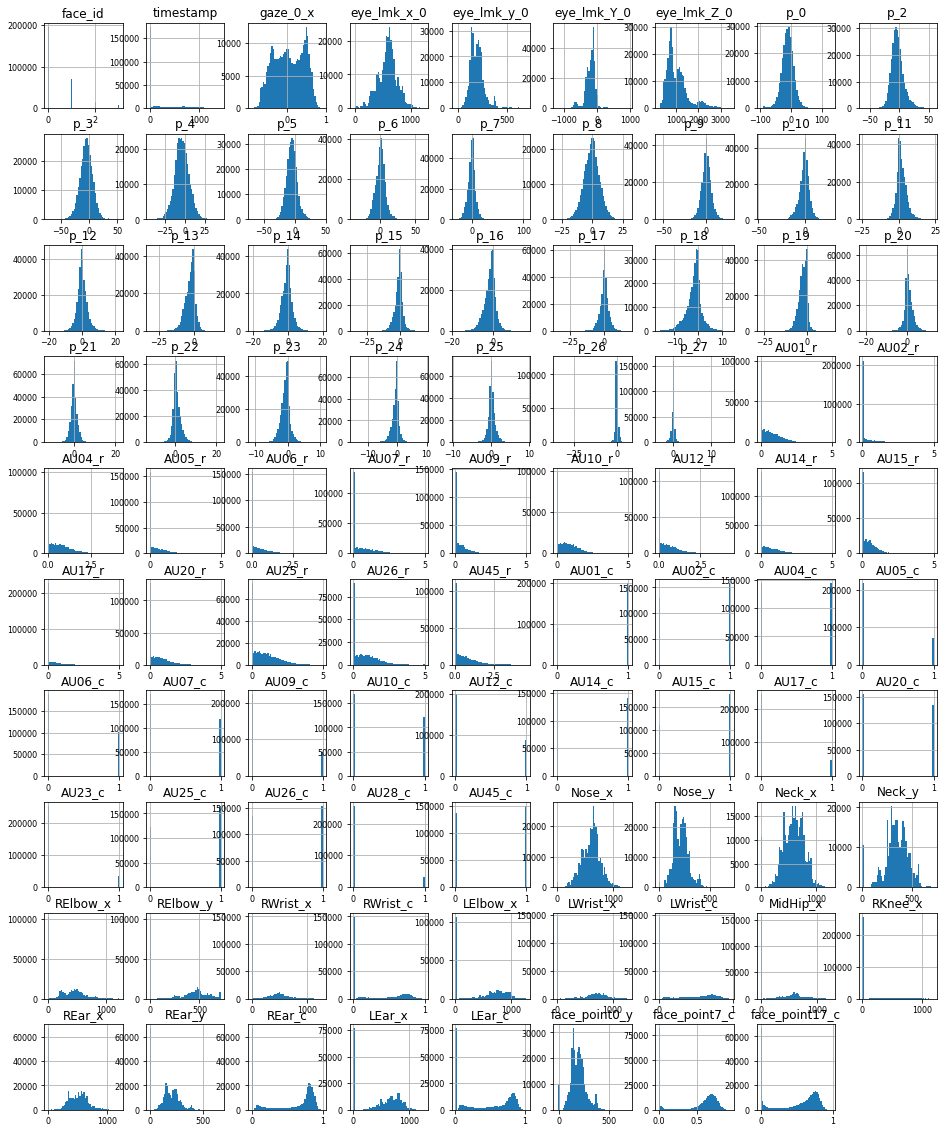

In [ ]:
X_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
list(X_train.columns)

['face_id',
 'timestamp',
 'gaze_0_x',
 'eye_lmk_x_0',
 'eye_lmk_y_0',
 'eye_lmk_Y_0',
 'eye_lmk_Z_0',
 'p_0',
 'p_2',
 'p_3',
 'p_4',
 'p_5',
 'p_6',
 'p_7',
 'p_8',
 'p_9',
 'p_10',
 'p_11',
 'p_12',
 'p_13',
 'p_14',
 'p_15',
 'p_16',
 'p_17',
 'p_18',
 'p_19',
 'p_20',
 'p_21',
 'p_22',
 'p_23',
 'p_24',
 'p_25',
 'p_26',
 'p_27',
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Nose_x',
 'Nose_y',
 'Neck_x',
 'Neck_y',
 'RElbow_x',
 'RElbow_y',
 'RWrist_x',
 'RWrist_c',
 'LElbow_x',
 'LWrist_x',
 'LWrist_c',
 'MidHip_x',
 'RKnee_x',
 'REar_x',
 'REar_y',
 'REar_c',
 'LEar_x',
 'LEar_c',
 'face_point0_y',
 'face_point7_c',
 'face_point17_c']

In [ ]:
# Building pipelines
## Features
features = ['face_id',
 'timestamp',
 'gaze_0_x',
 'eye_lmk_x_0',
 'eye_lmk_y_0',
 'eye_lmk_Y_0',
 'eye_lmk_Z_0',
 'p_0',
 'p_2',
 'p_3',
 'p_4',
 'p_5',
 'p_6',
 'p_7',
 'p_8',
 'p_9',
 'p_10',
 'p_11',
 'p_12',
 'p_13',
 'p_14',
 'p_15',
 'p_16',
 'p_17',
 'p_18',
 'p_19',
 'p_20',
 'p_21',
 'p_22',
 'p_23',
 'p_24',
 'p_25',
 'p_26',
 'p_27',
 'AU01_r',
 'AU02_r',
 'AU04_r',
 'AU05_r',
 'AU06_r',
 'AU07_r',
 'AU09_r',
 'AU10_r',
 'AU12_r',
 'AU14_r',
 'AU15_r',
 'AU17_r',
 'AU20_r',
 'AU25_r',
 'AU26_r',
 'AU45_r',
 'AU01_c',
 'AU02_c',
 'AU04_c',
 'AU05_c',
 'AU06_c',
 'AU07_c',
 'AU09_c',
 'AU10_c',
 'AU12_c',
 'AU14_c',
 'AU15_c',
 'AU17_c',
 'AU20_c',
 'AU23_c',
 'AU25_c',
 'AU26_c',
 'AU28_c',
 'AU45_c',
 'Nose_x',
 'Nose_y',
 'Neck_x',
 'Neck_y',
 'RElbow_x',
 'RElbow_y',
 'RWrist_x',
 'RWrist_c',
 'LElbow_x',
 'LWrist_x',
 'LWrist_c',
 'MidHip_x',
 'RKnee_x',
 'REar_x',
 'REar_y',
 'REar_c',
 'LEar_x',
 'LEar_c',
 'face_point0_y',
 'face_point7_c',
 'face_point17_c']

## Converter pipeline
### Pipeline definition
transformer = Pipeline(steps=[
    ("scaler", StandardScaler()) #standardize features
])

### Integration (feature -> transformer)
preprocessor = ColumnTransformer(transformers=[
    ("transform", transformer, features)
])

## Whole pipeline: converter pipeline -> predictor (estimator)
pipeline = Pipeline(steps=[
    ("preprocesser", preprocessor),      #converter pipeline
    ("classifier", RandomForestClassifier()) #predictor (estimator)
])

In [ ]:
# Building pipelines with training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocesser',
                 ColumnTransformer(transformers=[('transform',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['face_id', 'timestamp',
                                                   'gaze_0_x', 'eye_lmk_x_0',
                                                   'eye_lmk_y_0', 'eye_lmk_Y_0',
                                                   'eye_lmk_Z_0', 'p_0', 'p_2',
                                                   'p_3', 'p_4', 'p_5', 'p_6',
                                                   'p_7', 'p_8', 'p_9', 'p_10',
                                                   'p_11', 'p_12', 'p_13',
                                                   'p_14', 'p_15', 'p_16',
                                                   'p_17', 'p_18', 'p_19',
                                         

In [ ]:
# Accuracy verification with test data
y_test_pred = pipeline.predict(X_test)
print('accuracy:', accuracy_score(y_test, y_test_pred))

accuracy: 0.9625131702988965


In [ ]:
# Setting up a grid search
param_grid = [
    {
        "preprocesser__transform__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],       
        "classifier__n_estimators": [10, 100],
        "classifier": [RandomForestClassifier()]
    }
]
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)

In [ ]:
# Run a grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesser',
                                        ColumnTransformer(transformers=[('transform',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['face_id',
                                                                          'timestamp',
                                                                          'gaze_0_x',
                                                                          'eye_lmk_x_0',
                                                                          'eye_lmk_y_0',
                                                                          'eye_lmk_Y_0',
                                                                          'eye_lmk_Z_0',
              

In [ ]:
# Grid search results
print(grid_search.best_params_) #Optimal pipeline
print(grid_search.best_score_)  #Percentage of correct answers

{'classifier': RandomForestClassifier(), 'classifier__n_estimators': 100, 'preprocesser__transform__scaler': MinMaxScaler()}
0.953144441556191


In [ ]:
# Accuracy verification with test data
y_test_pred = grid_search.predict(X_test)
print('accuracy:',accuracy_score(y_test, y_test_pred))

accuracy: 0.963220207397549
